In [1]:
# Import all neccesary modules for cleaning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings

# Internal EDA functions
import functions.edafunctions as edafuncs

In [2]:
warnings.filterwarnings("ignore") # Low memory - diff types warning
df_p2p = pd.read_csv("data/merged_df.csv")
pd.set_option('display.max_columns', 200)
df_p2p.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,

In [3]:
# Change verbose to true for more information
df_p2p.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507520 entries, 0 to 2507519
Columns: 145 entries, Unnamed: 0 to settlement_term
dtypes: float64(107), int64(1), object(37)
memory usage: 2.7+ GB


In [4]:
# Column description
df_p2p.describe(include='all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,2.507520e+06,0.0,0.0,2.507482e+06,2.507482e+06,2.507482e+06,2507482,2507482,2.507482e+06,2507482,2507482,2301979,2337776,2507482,2.507478e+06,2507482,2507482,2507482,2507482,0.0,126067,2507482,2484157,2507481,2507482,2.505202e+06,2.507453e+06,2507453,2.507452e+06,1.209417e+06,386632.000000,2.507453e+06,2.507453e+06,2.507482e+06,2505396,2.507453e+06,2507482,2.507482e+06,2.507482e+06,2.507482e+06,2.507482e+06,2.507482e+06,2.507482e+06,2.507482e+06,2.507482e+06,2.507482e+06,2495815,2.507482e+06,1021958,2507407,2.507337e+06,634565.000000,2507482.0,2507482,1.566670e+05,156663.000000,147589,2.507453e+06,2.437206e+06,2.437206e+06,1.641352e+06,1.641353e+06,1.641353e+06,1.641353e+06,1.590461e+06,1.641353e+06,1.402949e+06,1.641353e+06,1.641353e+06,1.641353e+06,1.641080e+06,2.437206e+06,1.641353e+06,1.641352e+06,1.641352e+06,2.457452e+06,2.437122e+06,2.429689e+06,2.428439e+06,2.507337e+06,2.507453e+06,2.361314e+06,2.437205e+06,2.437205e+06,2.437206e+06,2.457452e+06,2.431341e+06,568275.000000,2.181815e+06,811400.000000,2.437206e+06,2.437206e+06,2.437206e+06,2.448892e+06,2.437206e+06,2.437206e+06,2.437206e+06,2.437205e+06,2.437206e+06,2.448892e+06,2.348291e+06,2.437206e+06,2.437206e+06,2.437206e+06,2.437051e+06,2.429214e+06,2.506117e+06,2.507377e+06,2.437206e+06,2.457452e+06,2.457452e+06,2.437206e+06,1.439770e+05,143978,143978.000000,143978.000000,143978.000000,141585.000000,143978.000000,143978.000000,143978.000000,143978.000000,46792.000000,2507482,12030,12030,12030,12030.0,12030.000000,12030,12030,12030,12030.0,12030.000000,12030,9462.000000,12030.000000,12030.000000,2507482,39637,39637,39637,39637.000000,39637.000000,39637.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,688,NaN,7,35,5431

In [5]:
# Add a new column that shows how much of the principal the borrower has paid
df_p2p["perc_princ_paid"] = df_p2p.total_pymnt / df_p2p.loan_amnt

In [6]:
# List of all the columns that will be dropped
dropped_cols = [
    'Unnamed: 0',       # IDs not needed for data analysis
    'id',               # IDs not needed for data analysis
    'member_id',        # IDs not needed for data analysis
    'application_type', # All values homogeneous
    'funded_amnt',      # Values is forward looking
    'url',              # Only available to investors
    
    # These information below are not available before accepting the borrower, so very useless for training or drawing insights
    'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_percentage', 'settlement_term',
    'debt_settlement_flag', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount', 'hardship_loan_status',
    'hardship_dpd', 'hardship_length', 'hardship_start_date', 'hardship_end_date', 'hardship_amount', 'deferral_term',
    'hardship_status', 'hardship_reason', 'hardship_type', 'policy_code', 'recoveries', 'out_prncp_inv', 'out_prncp',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collection_recovery_fee', 'settlement_amount',
    'payment_plan_start_date', 'funded_amnt_inv', 'initial_list_status', 'hardship_flag', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collections_12_mths_ex_med'
]

In [7]:
# Drop all the listed columns
df_p2p.drop(axis=1, columns=dropped_cols, inplace=True)

In [8]:
# Drop rows which have all NaN values
print("There are {} rows before the NaN rows are dropped.".format(len(df_p2p)))
df_p2p.dropna(how='all', inplace=True)
print("There are {} rows after the NaN rows are dropped.".format(len(df_p2p)))

There are 2507520 rows before the NaN rows are dropped.
There are 2507482 rows after the NaN rows are dropped.


In [9]:
df_p2p.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,orig_projected_additional_accrued_interest,perc_princ_paid
count,2.507482e+06,2.507482e+06,2.507478e+06,2.505202e+06,2.507453e+06,2.507452e+06,1.209417e+06,386632.000000,2.507453e+06,2.507453e+06,2.507482e+06,2.507453e+06,634565.000000,1.566670e+05,156663.000000,2.507453e+06,2.437206e+06,2.437206e+06,1.641352e+06,1.641353e+06,1.641353e+06,1.641353e+06,1.590461e+06,1.641353e+06,1.402949e+06,1.641353e+06,1.641353e+06,1.641353e+06,1.641080e+06,2.437206e+06,1.641353e+06,1.641352e+06,1.641352e+06,2.457452e+06,2.437122e+06,2.429689e+06,2.428439e+06,2.507337e+06,2.507453e+06,2.361314e+06,2.437205e+06,2.437205e+06,2.437206e+06,2.457452e+06,2.431341e+06,568275.000000,2.181815e+06,811400.000000,2.437206e+06,2.437206e+06,2.437206e+06,2.448892e+06,2.437206e+06,2.437206e+06,2.437206e+06,2.437205e+06,2.437206e+06,2.448892e+06,2.348291e+06,2.437206e+06,2.437206e+06,2.437206e+06,2.437051e+06,2.429214e+06,2.506117e+06,2.507377e+06,2.437206e+06,2.457452e+06,2.457452e+06,2.437206e+06,1.439770e+05,143978.000000,143978.000000,143978.000000,141585.000000,143978.000000,143978.000000,143978.000000,143978.000000,46792.000000,9462.000000,2.507482e+06
mean,1.520204e+04,4.490856e+02,7.868570e+04,1.899871e+01,2.996503e-01,5.625619e-01,3.472086e+01,73.401208,1.163160e+01,1.891760e-01,1.677162e+04,2.407121e+01,44.351746,1.271144e+05,19.290536,3.739651e-03,2.264765e+02,1.435984e+05,9.268591e-01,2.789016e+00,6.816791e-01,1.570586e+00,2.101363e+01,3.591122e+04,6.900658e+01,1.273871e+00,2.706947e+00,5.890276e+03,5.663838e+01,3.526692e+04,1.030989e+00,1.489665e+00,2.011124e+00,4.504206e+00,1.362165e+04,1.189024e+04,5.706895e+01,8.338728e-03,1.142527e+01,1.256951e+02,1.808844e+02,1.419688e+01,8.344043e+00,1.537417e+00,2.496117e+01,39.333161,7.092986e+00,35.906486,4.949134e-01,3.684207e+00,5.620461e+00,4.801555e+00,7.673570e+00,8.431858e+00,8.255133e+00,1.390984e+01,5.570447e+00,1.164449e+01,5.719053e-04,2.528715e-03,8.049463e-02,2.070532e+00,9.418817e+01,4.143380e+01,1.266561e-01,4.216717e-02,1.801848e+05,5.156243e+04,2.379372e+04,4.429291e+04,3.490376e+04,0.615413,1.560523,11.501625,57.436267,3.026650,12.526226,0.041854,0.071921,37.375577,455.991636,8.101702e-01
std,9.327663e+03,2.698357e+02,1.120892e+05,1.486775e+01,8.577625e-01,8.726257e-01,2.190412e+01,26.464630,5.679582e+00,5.515915e-01,2.294458e+04,1.201300e+01,21.574279,7.597291e+04,7.890360,6.611312e-02,8.091875e+03,1.617711e+05,1.136415e+00,2.997026e+00,9.277484e-01,1.577262e+00,2.574155e+01,4.475325e+04,2.370754e+01,1.498827e+00,2.579881e+00,5.757141e+03,2.085571e+01,3.691799e+04,1.491035e+00,2.684871e+00,2.369944e+00,3.166064e+00,1.657573e+04,1.707088e+04,2.869092e+01,1.040313e-01,6.969114e+02,5.375714e+01,9.749597e+01,1.772665e+01,9.2188

In [10]:
# Convert columns to date times
df_p2p.issue_d = pd.to_datetime(
    df_p2p.issue_d, format='%b-%y', errors='coerce')
df_p2p.earliest_cr_line = pd.to_datetime(
    df_p2p.earliest_cr_line, format='%b-%y', errors='coerce')
df_p2p.sec_app_earliest_cr_line = pd.to_datetime( 
    df_p2p.sec_app_earliest_cr_line, format='%b-%y', errors='coerce')

In [11]:
# Add credit length and secondary app credit length
df_p2p['credit_length_years'] = df_p2p.issue_d - df_p2p.earliest_cr_line
df_p2p['credit_length_years'].fillna(0, inplace=True)
df_p2p['credit_length_years'] = (df_p2p['credit_length_years'].dt.days/365).astype(int)
df_p2p['secondary_app_credit_length_years'] = df_p2p.issue_d - df_p2p.sec_app_earliest_cr_line
df_p2p['secondary_app_credit_length_years'].fillna(0, inplace=True)
df_p2p['secondary_app_credit_length_years'] = (df_p2p['secondary_app_credit_length_years'].dt.days/365).astype(int)

In [12]:
# Delete the date time columns, they are not needed now
# df_p2p.drop(axis=1, columns=['earliest_cr_line','sec_app_earliest_cr_line'], inplace=True)

In [13]:
len(df_p2p)

2507482

In [14]:
# Convert interest rate from string to percentage
df_p2p['int_rate'] = (df_p2p['int_rate'].str.strip('%')).astype(float)

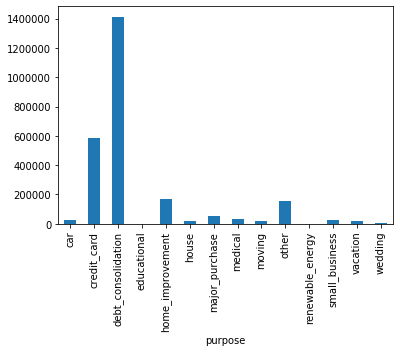

In [15]:
# Check what reasons people are taking loans out for
_ = df_p2p.groupby('purpose').size().plot.bar()
plt.show()

This means one of two things, either the borrowers are mostly requesting loans for credit card debt and refinancing or that the lending platform accepts more people with these reasons and rejects people of other reasons.

In [16]:
df_p2p.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,orig_projected_additional_accrued_interest,perc_princ_paid,credit_length_years,secondary_app_credit_length_years
0,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.172631,26,0
1,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405812,12,0
2,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.252361,10,0


In [17]:
# Even more conversion, convert emp_length into numeric
regex_pattern = r'[^0-9]'
df_p2p['emp_length'] = df_p2p['emp_length'].str.replace(regex_pattern, '')

In [18]:
# Print percentage of NaNs for each column
def percentage_na(col):
    '''Takes in a column and returns percentage of items in the column that are NaN'''
    num_null = col.isna().sum()
    num_tot = len(col)
    return (num_null/num_tot)*100

In [19]:
# Drop all columns with all NaNs
df_p2p.dropna(axis=1, how='all', inplace=True)

In [20]:
# Description might be useful but it has too many NaNs
# I think a description flag column would be better
df_p2p['has_desc'] = np.where(df_p2p['desc'].isna(), 0, 1)

# Drop the columns that have mostly NaNs
df_p2p.drop(axis=1, columns=['orig_projected_additional_accrued_interest', 'desc'], inplace=True)

In [21]:
# More conversion
df_p2p['term'] = df_p2p['term'].str.strip('months').astype(int)/12

In [22]:
df_p2p.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,perc_princ_paid,credit_length_years,secondary_app_credit_length_years,has_desc
0,5000.0,3.0,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.172631,26,0,1
1,2500.0,5.0,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405812,12,0,1
2,2400.0,3.0,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.252361,10,0,0


In [23]:
# Split dataframe data by grade into a dictionary
grades = ['A','B','C','D','E','F','G']
dict_grade_split = dict()
for grade in grades:
    dict_grade_split[grade] = df_p2p[df_p2p['grade'] == grade]

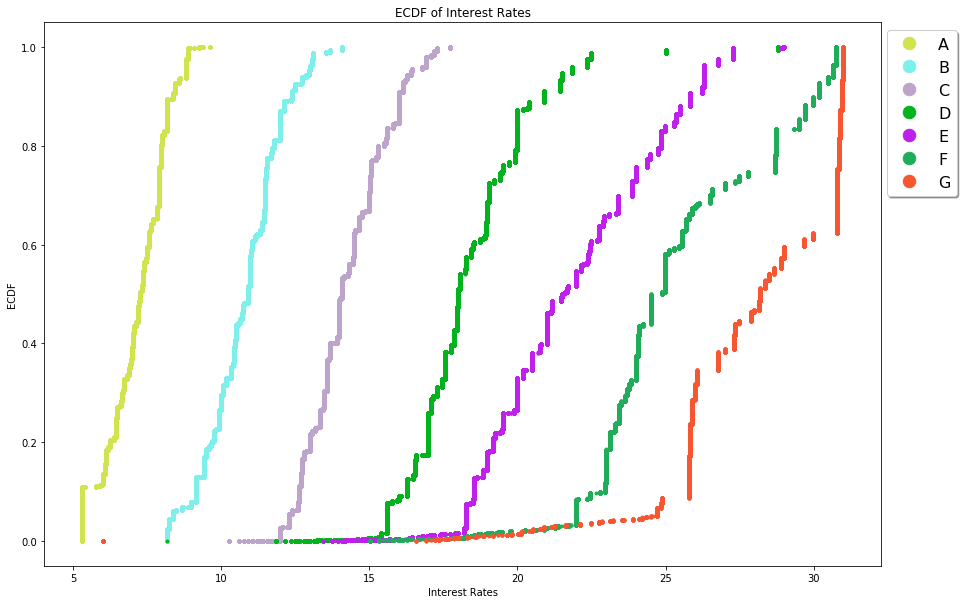

In [24]:
# ECDF for interest rates for each grade
edafuncs.plot_ecdf([(dict_grade_split[grade]['int_rate'], grade) for grade in grades], name='Interest Rates')

This is pretty obvious, if a person is risky you can charge them more. This is exactly like how we expect it to be. There are some low interest with low grades which is very perculiar, possible mislabeled grades, but hard to determine otherwise.

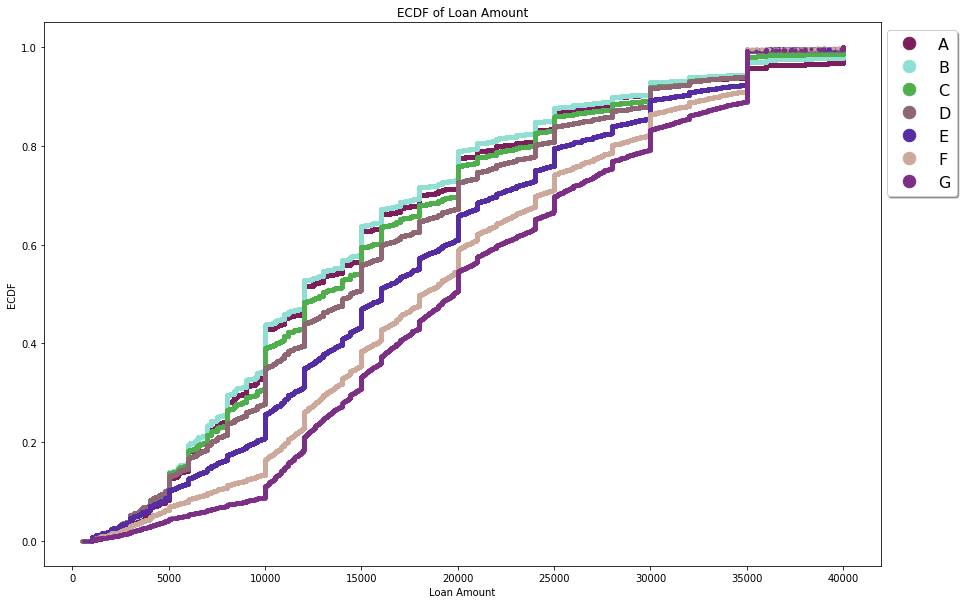

In [25]:
# ECDF for interest rates for each Loan Amount
edafuncs.plot_ecdf([(dict_grade_split[grade]['loan_amnt'], grade) for grade in grades], name='Loan Amount')

Those with lower grades happen to have less loan amounts. This could be several reasons, one could be that lending club does not accept those that are risky and loan a lot. 

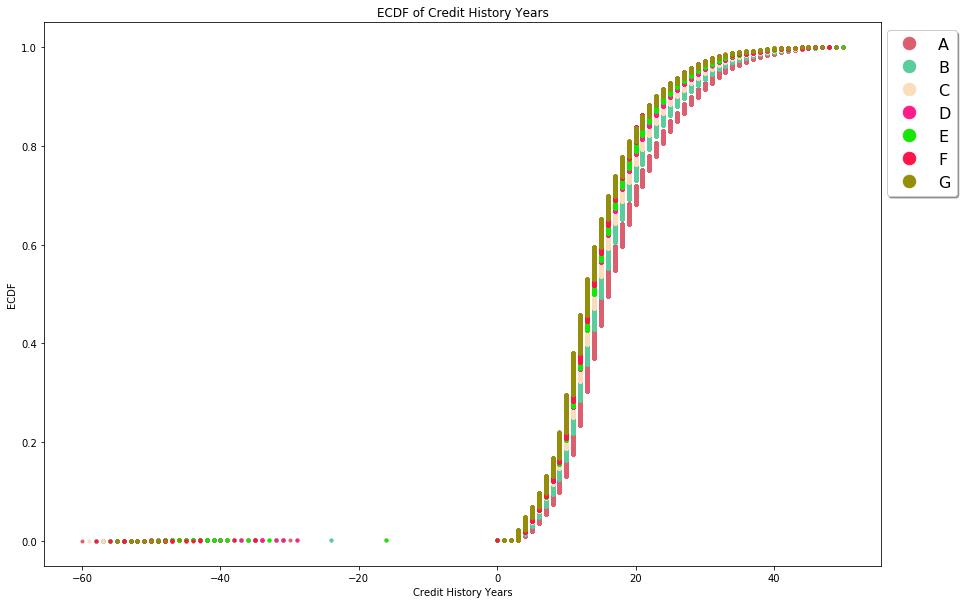

In [26]:
# ECDF for interest rates for Credit history
edafuncs.plot_ecdf([(dict_grade_split[grade]['credit_length_years'], grade) for grade in grades], name='Credit History Years')

Most of this is overlapping which means credit history does not really contribute to the current riskiness factor model. There are also several outliers which needs to be fixed.

In [27]:
# Fix the outliers by setting negative dates to 0
df_p2p.loc[df_p2p['credit_length_years'] < 0, 'credit_length_years'] = 0

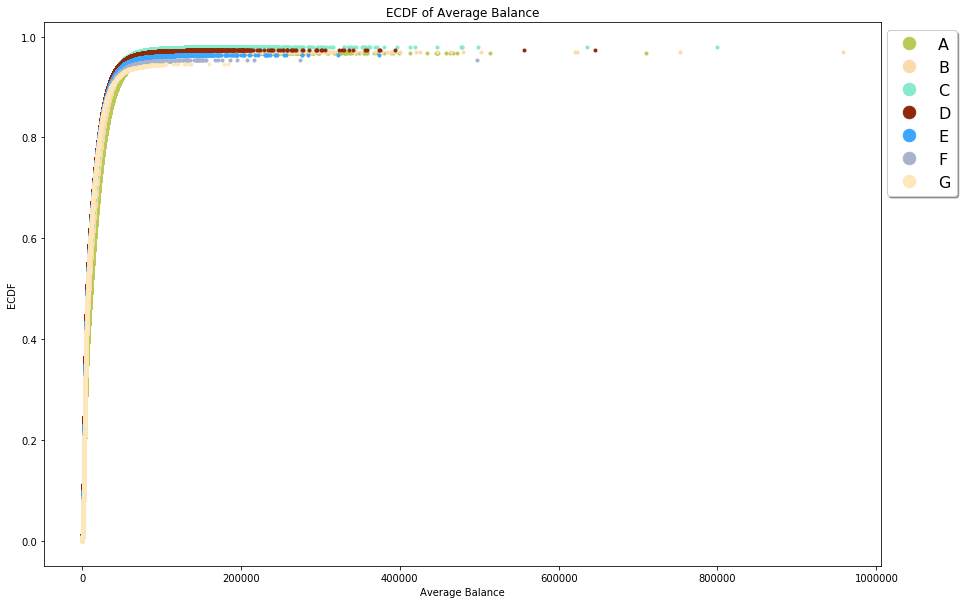

In [28]:
# ECDF for interest rates for average balance
edafuncs.plot_ecdf([(dict_grade_split[grade]['avg_cur_bal'], grade) for grade in grades], name='Average Balance')

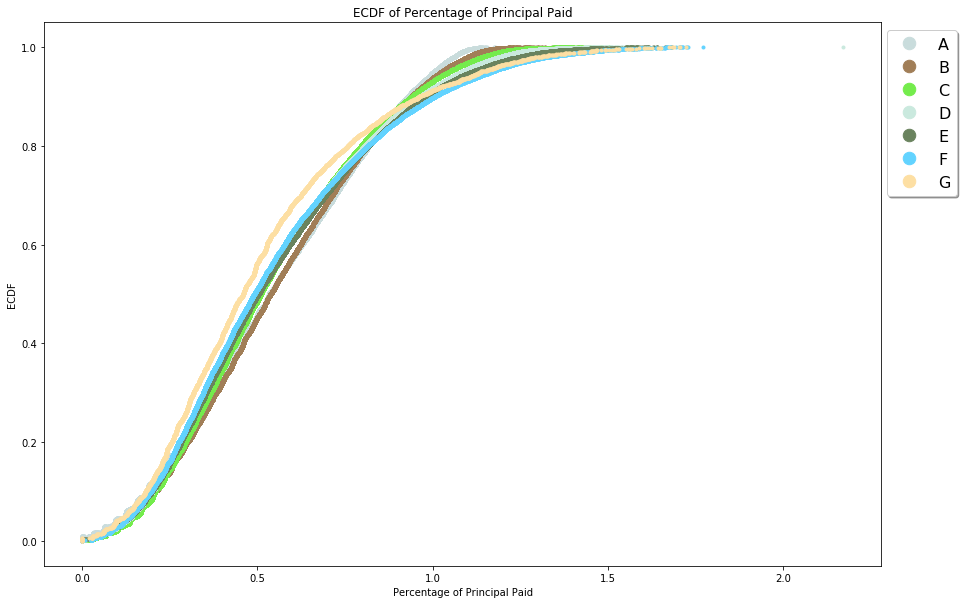

In [29]:
# ECDF for principal paid back for charged off percentage of principal paid back
edafuncs.plot_ecdf([(dict_grade_split[grade]['perc_princ_paid'][dict_grade_split[grade]['loan_status'] == 'Charged Off'], grade) for grade in grades], name='Percentage of Principal Paid')

In [30]:
# List of column name and the value we want to fill each NaN with
# 'MAX' means we want to fill it with the max() value of the column
to_fill_na = [("emp_title", "Unknown"),                  # Employment title
              ("emp_length", 0),                         # Employment length
              ("mths_since_last_delinq", "MAX"),         # Months since last deliquency
              ("mths_since_last_record", 0),             # The number of months since the last public record.
              ("mths_since_last_major_derog","MAX"),     # Months since most recent 90-day or worse rating 
              ("revol_util", 0),                         # Revolving credit utilization
              ("avg_cur_bal", 0),                        # Average balance
              ("bc_open_to_buy", 0),                     # Total open to buy on bank cards
              ("bc_util", 0),                            # Bank card utilization
              ("mo_sin_old_il_acct", 0),                 # Months since oldest bank installment account opened
              ("mths_since_recent_bc", 0),               # Months since most recent bank card account open
              ("mths_since_recent_bc_dlq", "MAX"),       # Months since most recent bank card deliquency
              ("mths_since_recent_inq", 0),              # Months since most recent inquiry.
              ("mths_since_recent_revol_delinq", "MAX"), # Months since most recent revolving credit deliquency
              ("num_tl_120dpd_2m", 0),                   # Number of accounts ever 120 or more days past due
              ("percent_bc_gt_75", 0)]                   # Percentage of all bankcard accounts > 75% of limit.

edafuncs.fill_nas(df_p2p, to_fill_na)

In [31]:
edafuncs.show_drop_cols(df_p2p)

Column: annual_inc has 0.00015952258082012154% values NaN
Column: title has 0.9302160494073338% values NaN
Column: zip_code has 3.9880645205030385e-05% values NaN
Column: dti has 0.09092787106746929% values NaN
Column: delinq_2yrs has 0.0011565387109458813% values NaN
Column: earliest_cr_line has 0.0011565387109458813% values NaN
Column: inq_last_6mths has 0.0011964193561509115% values NaN
Column: open_acc has 0.0011565387109458813% values NaN
Column: pub_rec has 0.0011565387109458813% values NaN
Column: total_acc has 0.0011565387109458813% values NaN
Column: annual_inc_joint has 93.75201895766351% values NaN
Column: dti_joint has 93.75217848024432% values NaN
Column: verification_status_joint has 94.11405545483477% values NaN
Column: acc_now_delinq has 0.0011565387109458813% values NaN
Column: tot_coll_amt has 2.802652222428715% values NaN
Column: tot_cur_bal has 2.802652222428715% values NaN
Column: open_acc_6m has 34.541823231432964% values NaN
Column: open_act_il has 34.54178335078

In [32]:
len(df_p2p.columns)

89

In [33]:
# Show how many columns that still have NaNs so we can fill in the NaNs
edafuncs.show_drop_cols(df_p2p)

Column: annual_inc has 0.00015952258082012154% values NaN
Column: title has 0.9302160494073338% values NaN
Column: zip_code has 3.9880645205030385e-05% values NaN
Column: dti has 0.09092787106746929% values NaN
Column: delinq_2yrs has 0.0011565387109458813% values NaN
Column: earliest_cr_line has 0.0011565387109458813% values NaN
Column: inq_last_6mths has 0.0011964193561509115% values NaN
Column: open_acc has 0.0011565387109458813% values NaN
Column: pub_rec has 0.0011565387109458813% values NaN
Column: total_acc has 0.0011565387109458813% values NaN
Column: acc_now_delinq has 0.0011565387109458813% values NaN
Column: tot_coll_amt has 2.802652222428715% values NaN
Column: tot_cur_bal has 2.802652222428715% values NaN
Column: open_acc_6m has 34.541823231432964% values NaN
Column: open_act_il has 34.54178335078776% values NaN
Column: open_il_12m has 34.54178335078776% values NaN
Column: open_il_24m has 34.54178335078776% values NaN
Column: mths_since_rcnt_il has 36.57138914656217% value

In [34]:
to_fill_na = [
    ("annual_inc", 0),                    # Annual Income
    ("title", "None"),                    # The loan title provided by the borrower
    ("delinq_2yrs", 0),                   # The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
    ("inq_last_6mths", 0),                # The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
    ("open_acc", 0),                      # The number of open credit lines in the borrower's credit file
    ("pub_rec", 0),                       # Number of derogatory public records
    ("total_acc", 0),                     # The total number of credit lines currently in the borrower's credit file
    ("acc_now_delinq", 0),                # The number of accounts on which the borrower is now delinquent.
    ("tot_coll_amt", 0),                  # Total collection amounts ever owed
    ("tot_cur_bal", 0),                   # Total current balance of all accounts
    ("total_rev_hi_lim", 0),              # Total high credit/credit limit
    ("acc_open_past_24mths", 0),          # Number of trades opened in past 24 months.
    ("chargeoff_within_12_mths", 0),      # Number of charge-offs within 12 months
    ("delinq_amnt", 0),                   # The past-due amount owed for the accounts on which the borrower is now delinquent.
    ("mo_sin_old_rev_tl_op", 0),          # Months since oldest revolving account opened
    ("mo_sin_rcnt_rev_tl_op", 0),         # Months since most recent revolving account opened 
    ("mo_sin_rcnt_tl", 0),                # Months since most recent account opened
    ("mort_acc", 0),                      # Number of mortgage accounts.
    ("num_accts_ever_120_pd", 0),         # Number of accounts ever 120 or more days past due
    ("num_actv_bc_tl", 0),                # Number of currently active bankcard accounts
    ("num_actv_rev_tl", 0),               # Number of currently active revolving trades
    ("num_bc_sats", 0),                   # Number of satisfactory bankcard accounts
    ("num_bc_tl", 0),                     # Number of bankcard accounts
    ("num_il_tl", 0),                     # Number of installment accounts
    ("num_op_rev_tl", 0),                 # Number of open revolving accounts
    ("num_rev_accts", 0),                 # Number of revolving accounts
    ("num_rev_tl_bal_gt_0", 0),           # Number of revolving trades with balance >0
    ("num_sats", 0),                      # Number of satisfactory accounts
    ("num_tl_30dpd", 0),                  # Number of accounts currently 30 days past due (updated in past 2 months)
    ("num_tl_90g_dpd_24m", 0),            # Number of accounts 90 or more days past due in last 24 months
    ("num_tl_op_past_12m", 0),            # Number of accounts opened in past 12 months
    ("pct_tl_nvr_dlq", 0),                # Percent of trades never delinquent
    ("pub_rec_bankruptcies", 0),          # Number of public record bankruptcies
    ("tax_liens", 0),                     # Number of tax liens
    ("tot_hi_cred_lim", 0),               # Total high credit/credit limit
    ("total_bal_ex_mort", 0),             # Total credit balance excluding mortgage
    ("total_bc_limit", 0),                # Total bankcard high credit/credit limit
    ("total_il_high_credit_limit", 0),    # Total installment high credit/credit limit
    # Some more 
    ("open_acc_6m", 0),                   # Number of open trades in last 6 months
    ("open_act_il", 0),                   # Number of currently active installment trades
    ("open_il_12m", 0),                   # Number of installment accounts opened in past 12 months
    ("open_il_24m", 0),                   # Number of installment accounts opened in past 24 months
    ("mths_since_rcnt_il", 0),            # Months since most recent installment accounts opened
    ("total_bal_il", 0),                  # Total current balance of all installment accounts
    ("il_util", 0),                       # Ratio of total current balance to high credit/credit limit on all install acct
    ("open_rv_12m", 0),                   # Number of revolving trades opened in past 12 months
    ("open_rv_24m", 0),                   # Number of revolving trades opened in past 24 months
    ("max_bal_bc", 0),                    # Maximum current balance owed on all revolving accounts
    ("all_util", 0),                      # Balance to credit limit on all trades
    ("inq_fi", 0),                        # Number of personal finance inquiries
    ("total_cu_tl", 0),                   # Number of finance trades
    ("inq_last_12m", 0),                  # Number of credit inquiries in past 12 months
] 

edafuncs.fill_nas(df_p2p, to_fill_na)

In [35]:
# Show how many columns that still have NaNs so we can fill in the NaNs
edafuncs.show_drop_cols(df_p2p)

Column: zip_code has 3.9880645205030385e-05% values NaN
Column: dti has 0.09092787106746929% values NaN
Column: earliest_cr_line has 0.0011565387109458813% values NaN


In [36]:
# Drop one row where zipcode was NaN
df_p2p = df_p2p[df_p2p['zip_code'].isna() == False]

There was literally just one entry where the zipcode is NaN, I decided to just drop it because it was insignificant.

In [37]:
# Convert NaN dtis and all dtis less than 0 to 0
df_p2p[(df_p2p['dti'].isna() == True) | (df_p2p['dti'] < 0)] = 0

In [38]:
# Show how many columns that still have NaNs so we can fill in the NaNs
edafuncs.show_drop_cols(df_p2p)

Column: earliest_cr_line has 0.001156539172181165% values NaN


No more NaN columns

In [39]:
df_p2p.head(30)['title']

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
13                            citicard fund
14                               Other Loan
15                  Debt Consolidation Loan
16                                     Home
17                                  Holiday
18                                  Medical
19      lowerratemeanseasiertogetoutofdebt!
20                Freedom From Credit Cards
21                             Debt Cleanup
22                         Credi

In [40]:
# Remove the rows with 'Current' loan status, since we do not know if they completed 
# their loans it is not useful to look at their data

not_ongoing_status = ((df_p2p['loan_status'] != 'Current') 
                      & (df_p2p['loan_status'] != 'In Grace Period')
                     & (df_p2p['loan_status'] != 'Unknown'))
df_p2p = df_p2p[not_ongoing_status]

# Convert late paid loans into Fully Paid loans
# There is very little Late paid ones and they are technically fully paid
# Additionally, I changed loans that were charged off to 0 and fully paid ones to 1

df_p2p['loan_status'] = np.where(df_p2p['loan_status'] == 'Charged Off', 0,1)

In [41]:
# Check the loan status of each grade
df_p2p_grade_loan_count = df_p2p.groupby(['grade','loan_status'])['loan_status'].size()
df_p2p_gl_perc = df_p2p_grade_loan_count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_p2p_gl_perc

grade  loan_status
0      1              100.000000
A      0                5.836534
       1               94.163466
B      0               12.998913
       1               87.001087
C      0               21.488817
       1               78.511183
D      0               28.697657
       1               71.302343
E      0               36.642615
       1               63.357385
F      0               43.480891
       1               56.519109
G      0               47.285672
       1               52.714328
Name: loan_status, dtype: float64

Above shows the grade breakdown, the riskiest loans in G have about a 44-50% chance of being charged off, while the safest grade A, has less than a 6% chance of being charged off. 

In [42]:
# Drop all the issue dates that are 0
df_p2p = df_p2p[[True if type(i) != int else False for i in df_p2p['issue_d'] ]]

In [43]:
# Show the percentage distribution of charge offs and grades for each year
years = np.unique(df_p2p['issue_d'].dt.year) # All the years
for year in years:
    df_year = df_p2p[df_p2p['issue_d'].dt.year ==  year]
    df_p2p_grade_loan_count = df_year.groupby(['grade','loan_status'])['loan_status'].size()
    df_p2p_gl_perc = df_p2p_grade_loan_count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    print(year, ":\n", df_p2p_gl_perc)

2007 :
 grade  loan_status
A      0                1.282051
       1               98.717949
B      0                8.163265
       1               91.836735
C      0                9.929078
       1               90.070922
D      0               15.151515
       1               84.848485
E      0                5.000000
       1               95.000000
F      0                3.846154
       1               96.153846
G      1              100.000000
Name: loan_status, dtype: float64
2008 :
 grade  loan_status
A      0               5.345912
       1              94.654088
B      0              12.457912
       1              87.542088
C      0              13.448276
       1              86.551724
D      0              12.887828
       1              87.112172
E      0               4.210526
       1              95.789474
F      0               9.009009
       1              90.990991
G      0               2.325581
       1              97.674419
Name: loan_status, dtype: float64
2

From the above stats, we can see that the recent two years are bias towards 'Fully Paid', this is because we ignored te loan statuses that are still currently on going. As time goes on we can expect the graph to direct towards the average.

In [44]:
df_p2p

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,perc_princ_paid,credit_length_years,secondary_app_credit_length_years,has_desc
0,5000.0,3.0,10.65,162.87,B,B2,Unknown,10,RENT,24000.00,Verified,2011-12-01 00:00:00,1,n,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01 00:00:00,1.0,226.0,0.0,3.0,0.0,13648.0,83.70%,9.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.172631,26,0,1
1,2500.0,5.0,15.27,59.83,C,C4,Ryder,1,RENT,30000.00,Source Verified,2011-12-01 00:00:00,0,n,car,bike,309xx,GA,1.00,0.0,1999-04-01 00:00:00,5.0,226.0,0.0,3.0,0.0,1687.0,9.40%,4.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405812,12,0,1
2,2400.0,3.0,15.96,84.33,C,C5,Unknown,10,RENT,12252.00,Not Verified,2011-12-01 00:00:00,1,n,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01 00:00:00,2.0,226.0,0.0,2.0,0.0,2956.0,98.50%,10.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.252361,10,0,0
3,10000.0,3.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01 00:00:00,1,n,other,personel,917xx,CA,20.00,0.0,1996-02-01 00:00:00,1.0,35.0,0.0,10.0,0.0,5598.0,21%,37.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.223189,15,0,1
4,3000.0,5.0,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.00,Source Verified,2011-12-01 00:00:00,1,n,other,Personal,972xx,OR,17.94,0.0,1996-01-01 00:00:00,0.0,38.0,0.0,15.0,0.0,27783.0,53.90%,38.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.355636,15,0,1
5,5000.0,3.0,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01 00:00:00,1,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2004-11-01 00:00:00,3.0,226.0,0.0,9.0,0.0,7963.0,28.30%,12.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.126442,7,0,0
6,7000.0,5.0,15.96,170.08,C

A few more things that we want to clean from the data before saving it as a csv

In [45]:
# Drop date time
df_p2p.drop(['earliest_cr_line'], axis=1, inplace=True)

In [46]:
# Turn revol_util into percentage
df_p2p['revol_util'] = df_p2p['revol_util'].str.strip("%").astype(float) * (1/100)

# Turn int_rate into percentage
df_p2p['int_rate'] = df_p2p['int_rate'] * (1/100)

In [47]:
# Export the data
df_p2p.to_csv("data/main_data.csv")